### Computational Guided Inquiry for PChem (Neshyba)

# Visualizing $U(T,V)$,  $C_V$, and $\pi_T$.

## Visualizing $U(T,V)$ as a thermodynamic surface

Internal energy is usually written as a function of T and V, designated by the notation $U=U(T,V)$. Conceptually, this energy is very straightforward: it is the sum of the kinetic and potential energies of all molecules in a given sample. Figure 1 below shows $U(T,V)$ of a real gas. You can see some of the behaviors expected of all gases (e.g., increasing $U$ with increasing temperature), and some of the behaviors expected specifically of real gases (see the low-volume part of state space).

<p style='text-align: center;'>
<img src="http://webspace.pugetsound.edu/facultypages/nesh/Notebook/UVT figure 3.png" height="500" width="500"/>  
<strong>Figure 1</strong>. Thermodynamic surface of the internal energy, $U$, of a gas in a volume / temperature state space.
</p>


## Visualizing $C_V$ and $\pi_T$

Formally, the slope of $U$ in the temperature direction, at constant volume, is written $\big(\frac{\partial U}{\partial T}\big)_V$. This slope has a name, the constant-volume heat capacity, symbolized $C_V$. So we say

$$
C_V =  \big(\frac{\partial U}{\partial T}\big)_V \ \ \ \ (1)
$$

Similarly, the slope of $U$ in the pressure direction is given a special symbol, $\pi_T$, and name, the *internal pressure* (because it has units pressure). So we say

$$ 
\pi_T =  \big(\frac{\partial U}{\partial V}\big)_T \ \ \ \ (2)
$$

We already have code to this -- the partial derivative functions dF_dx and dF_dy. There are a few tricky points about this that we'll address as we go along.


## About units
As previously, the data stored in the files that you'll be picking up in this exercise are *almost* all SI, with the exception of the energy values stored in Ugrid1.txt, etc. We're going to make this an all-SI CGI, so we'll be converting the energies to Joules "on the fly", i.e., as we load that data into Python. One consequence of that choice (a good consequence) is that we'll know the units of $C_V$ and $\pi_T$! As a teaser: since $C_V =  \big(\frac{\partial U}{\partial T}\big)_V$, it must have dimensions energy/temperature -- so according to the SI guarantee, that must be J/K (or J/mol-K if we're talking about one mole). Another teaser: since $\pi_T =  \big(\frac{\partial U}{\partial V}\big)_T$, it must have dimensions energy/volume, which turns out to be a pressure.


## Learning Goals
1. Given an image of $U(T,V)$ as a thermodynamic surface, I can predict what $C_V$ and $\pi_T$ will look like as thermodynamic surfaces. 
1. Given a state function (like $U(T,V)$) in gridded form, I can use partial derivative functions dF_dx and dF_dy to compute and display the corresponding partial derivatives ($C_V$ and $\pi_T$). 
1. I can use numpy's max function to pull out the maximum value of a variable or set of variables. (np.min works the same way, by the way).

In [1]:
# Import resources stored in the Pchem Library
%run ../PchemLibrary/ImportResources.ipynb

### Loading and inspecting the data
The cell below loads and plots three internal energy state functions on a $(T,V)$ state space grid. The state space is SI (degrees K for temperature, $m^3$ for volume). However, the energy is in kJ/mol, whereas SI would be J/mol. So we're making the conversion to SI "on the fly".

<IPython.core.display.Javascript object>


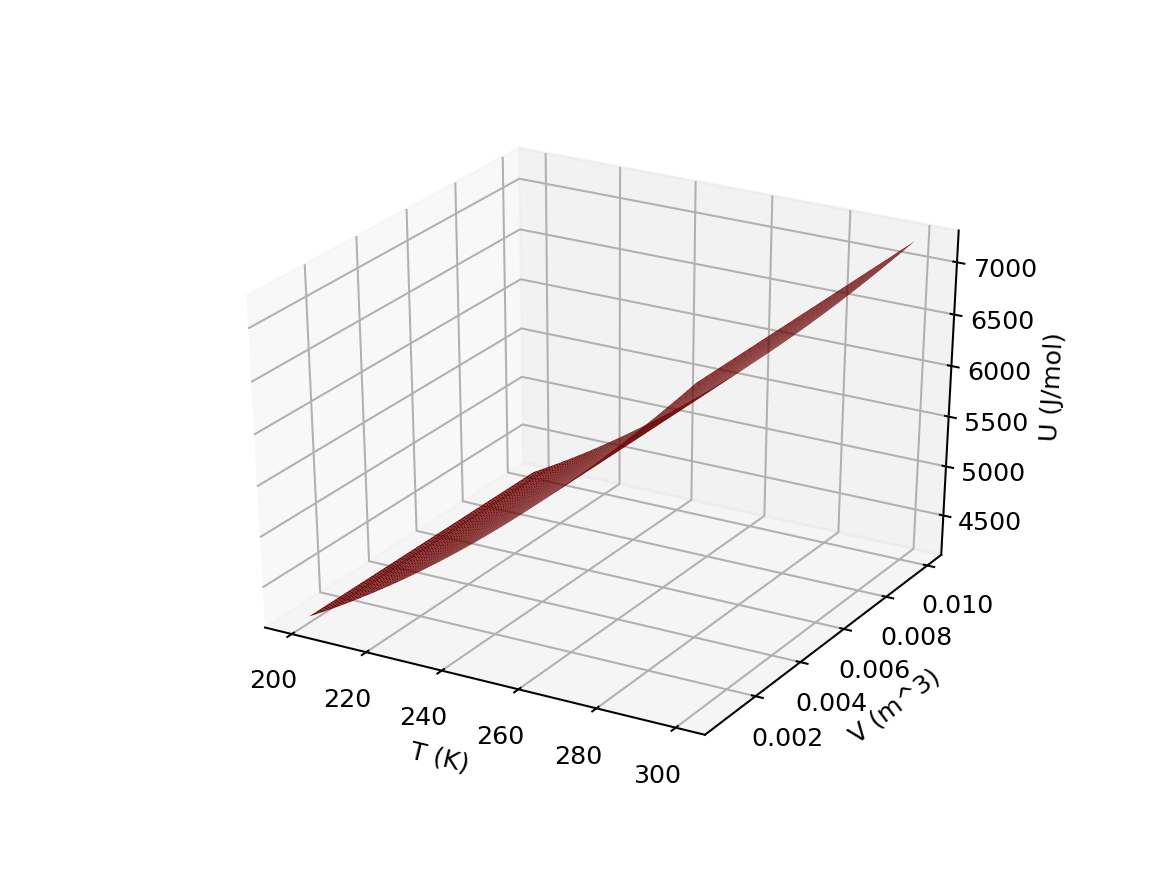

<IPython.core.display.Javascript object>


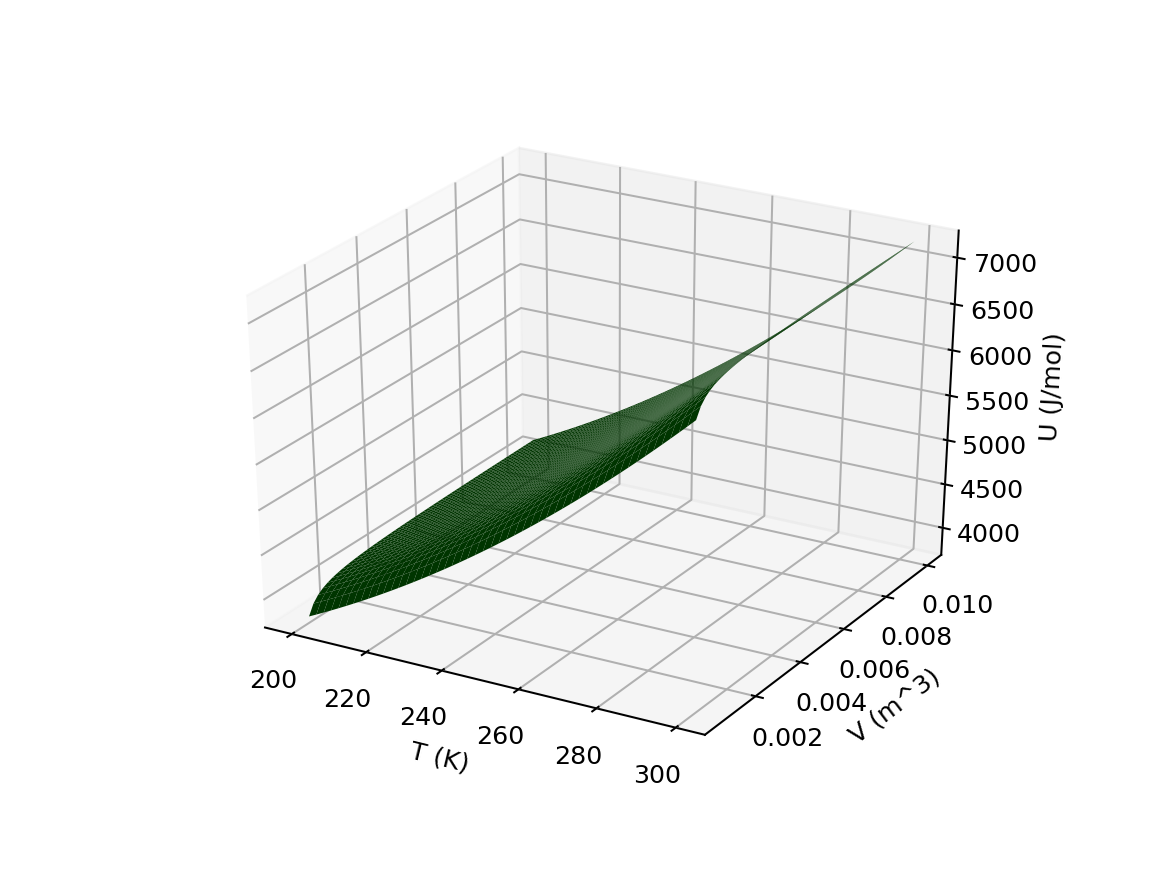

<IPython.core.display.Javascript object>


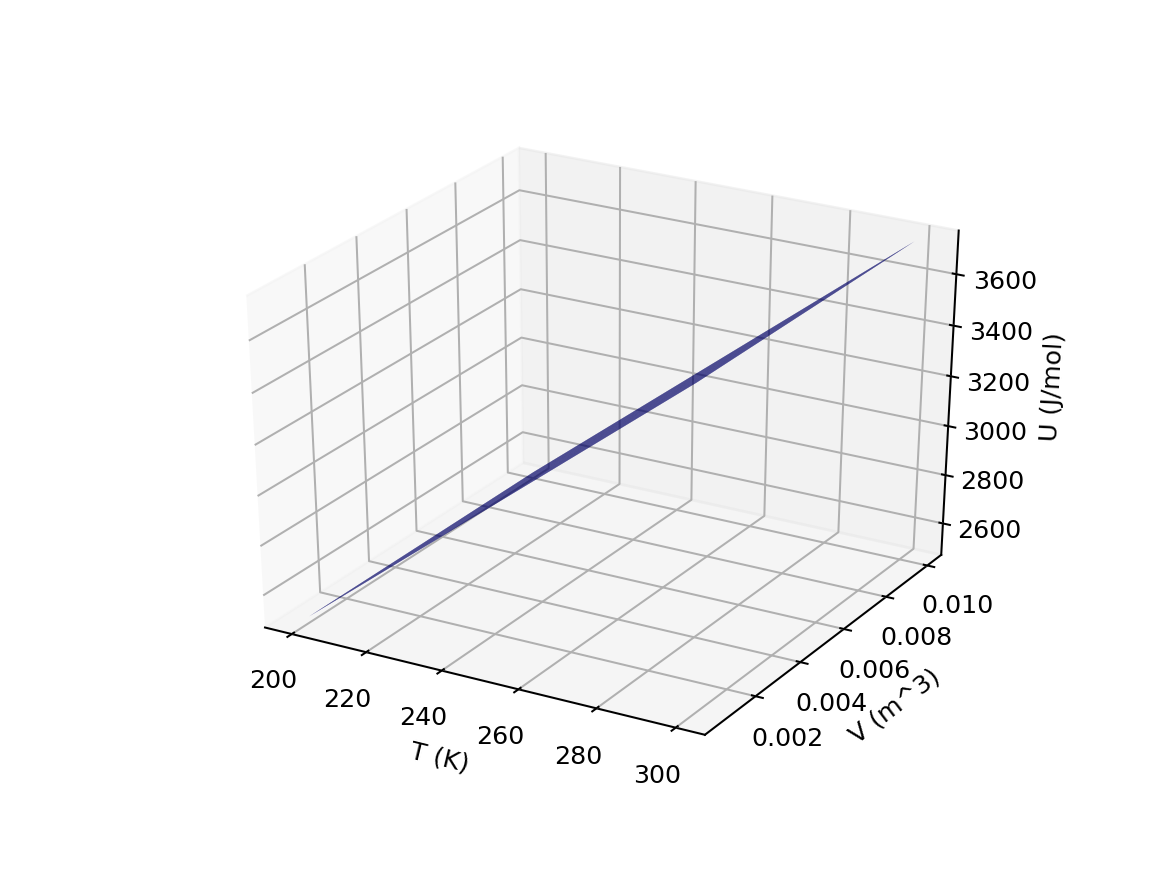

Text(0.5, 0, 'U (J/mol)')

In [2]:
# Load the thermodynamic state space
Tgrid = np.loadtxt('Tgrid.txt') # In K
Vgrid = np.loadtxt('Vgrid.txt') # In m^3

# Load three internal energy state functions 
Ugrid1 = np.loadtxt('Ugrid1.txt')*1e3  # Converting to J/mol on the fly
Ugrid2 = np.loadtxt('Ugrid2.txt')*1e3 
Ugrid3 = np.loadtxt('Ugrid3.txt')*1e3

# Open up a 3d figure window and plot all three surfaces in the same space

### BEGIN SOLUTION
# Plot surface 1
ax = PL.plot_surface(Tgrid, Vgrid, Ugrid1, color='red') # Make the mesh plot
ax.set_ylabel('V (m^3)') # Label axes
ax.set_xlabel('T (K)')
ax.set_zlabel('U (J/mol)')

# Plot surface 2
ax = PL.plot_surface(Tgrid, Vgrid, Ugrid2, color='green') # Make the mesh plot
ax.set_ylabel('V (m^3)') # Label axes
ax.set_xlabel('T (K)')
ax.set_zlabel('U (J/mol)')

# Plot surface 3
ax = PL.plot_surface(Tgrid, Vgrid, Ugrid3, color='blue') # Make the mesh plot
ax.set_ylabel('V (m^3)') # Label axes
ax.set_xlabel('T (K)')
ax.set_zlabel('U (J/mol)')
### END SOLUTION

### Computing $C_V$ as thermodynamic surfaces
In the cell below, we compute the three $C_V$ surfaces corresponding to these three $U(T,V)$ surfaces. We also use numpy's max function to get a sense of the scale $C_V$, so that when we go to visualize them, they can all be on the same vertical scale.

In [4]:
# Calculate the partial of U with respect to T (axis=0)
Tgridnew, Vgridnew, C_V1 = PL.dF_dx([Tgrid,Vgrid],Ugrid1)
Tgridnew, Vgridnew, C_V2 = PL.dF_dx([Tgrid,Vgrid],Ugrid2)
Tgridnew, Vgridnew, C_V3 = PL.dF_dx([Tgrid,Vgrid],Ugrid3)

# Get a sense of the max values for graphing
zmax = np.max([C_V1,C_V2,C_V3]); print(zmax)

Shape of partial derivative = (49, 50)
No units
Shape of partial derivative = (49, 50)
No units
Shape of partial derivative = (49, 50)
No units
40.58091836734775


### Your turn
In the cell below, plot the three $C_V$ surfaces (three separate graphs) in the usual way -- with the exception that you should specify the vertical axis of each graph using

    ax.set_zlim([0,zmax])



<IPython.core.display.Javascript object>


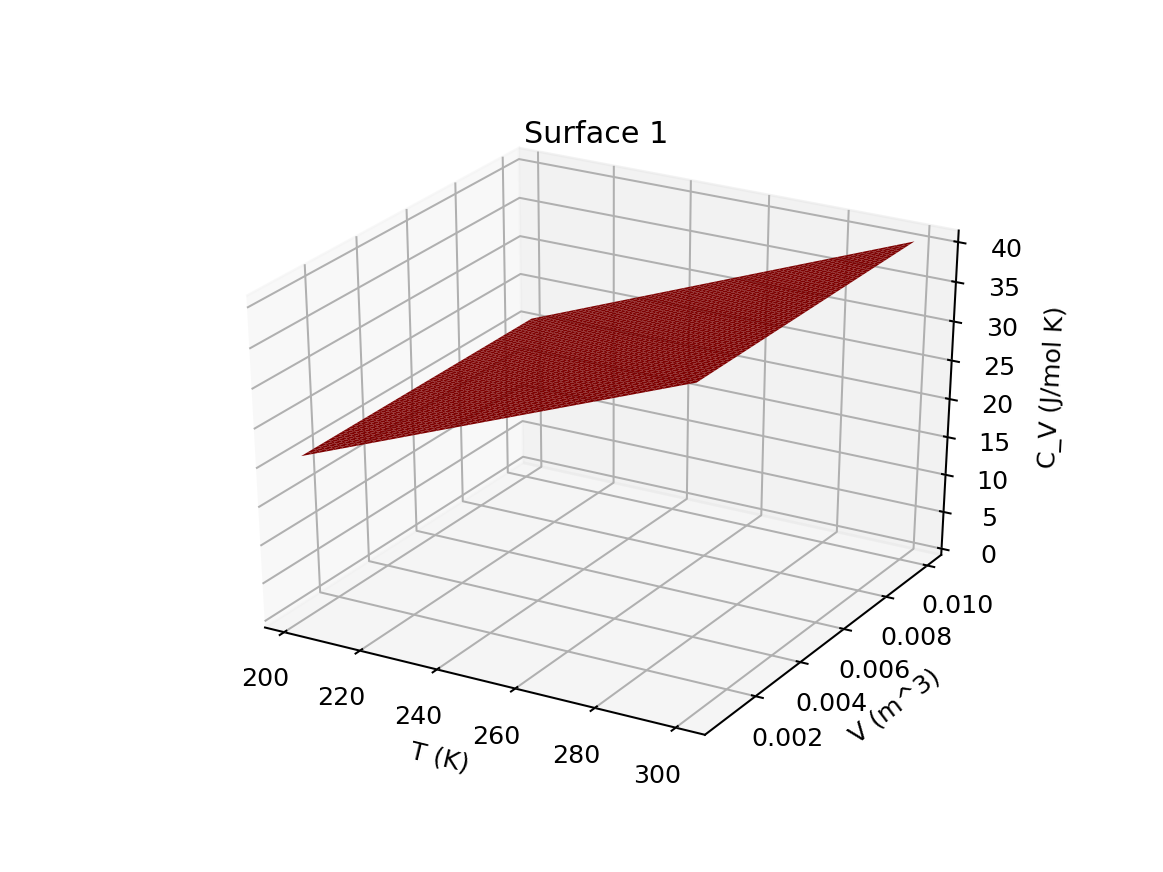

<IPython.core.display.Javascript object>


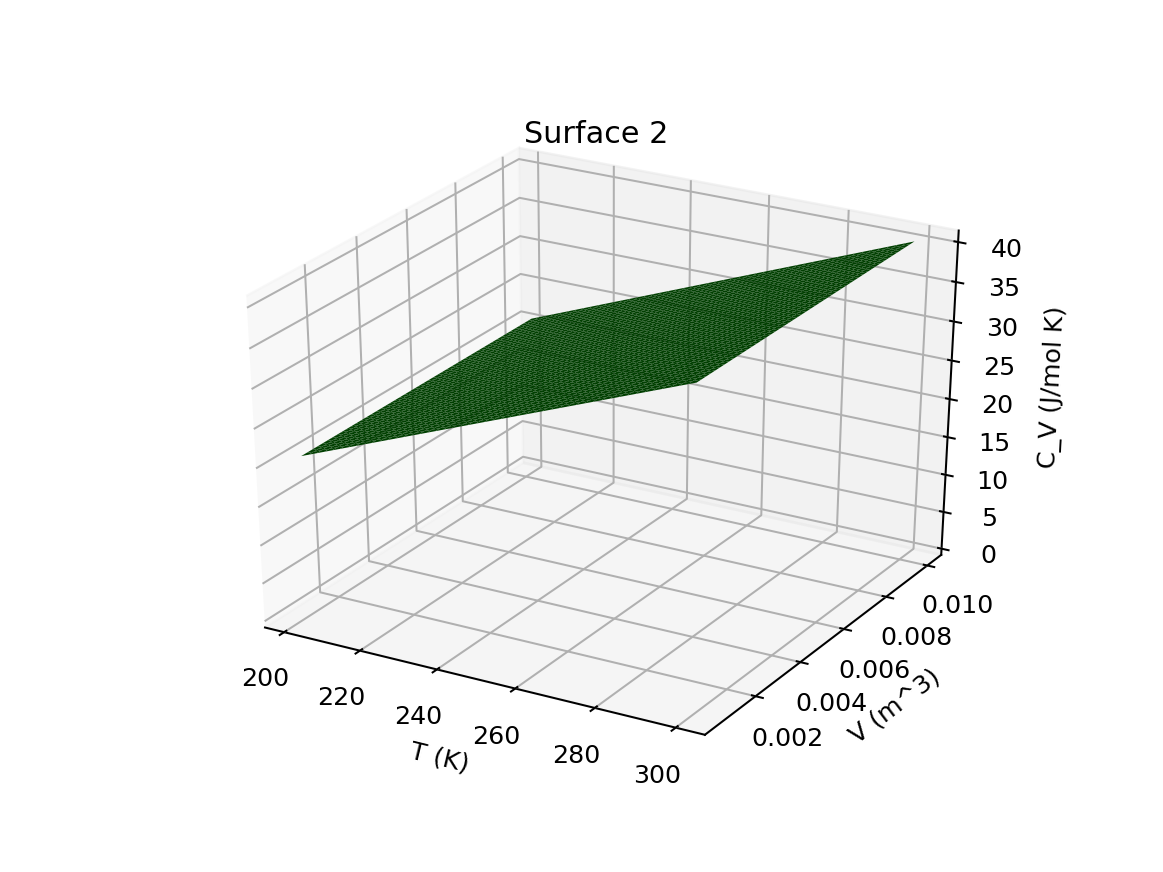

<IPython.core.display.Javascript object>


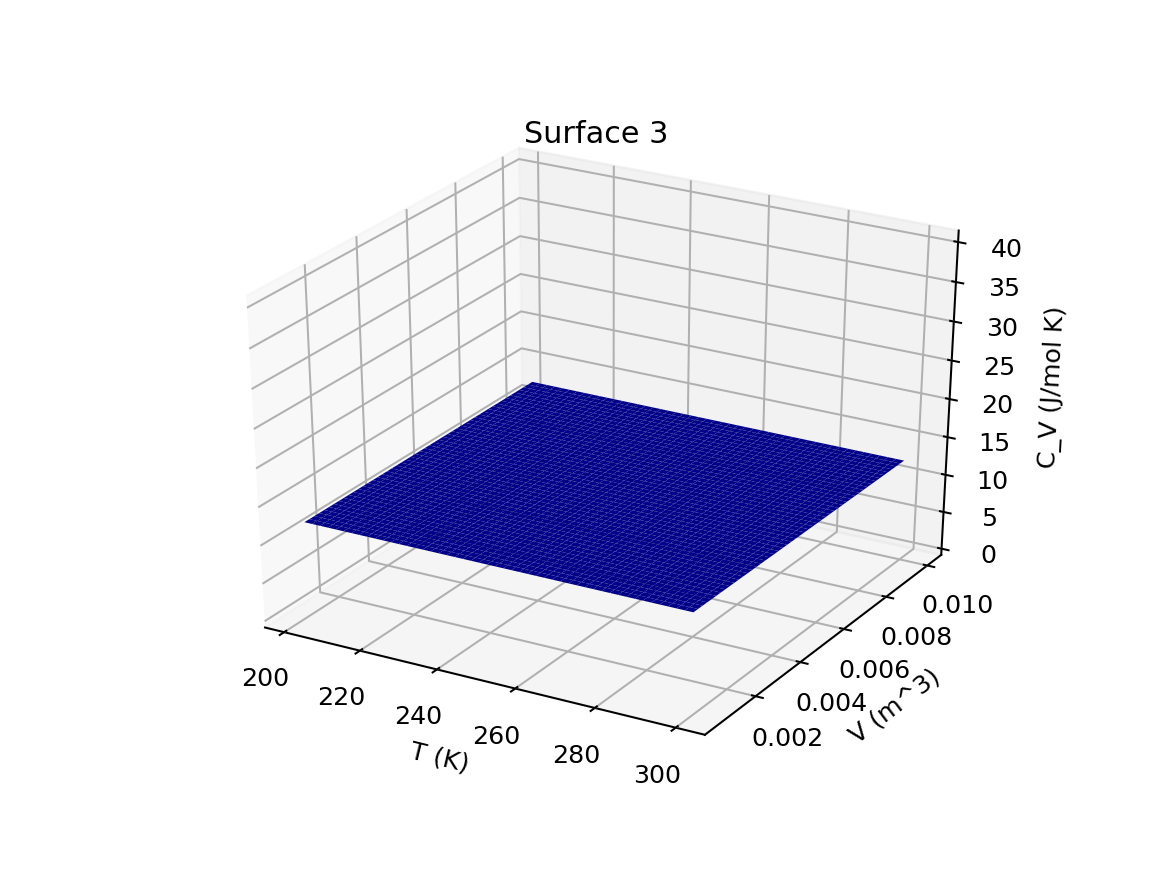

(0, 40.58091836734775)

In [5]:
# Plot surface 1 in its own space
### BEGIN SOLUTION
ax = PL.plot_surface(Tgridnew, Vgridnew, C_V1, color='red') # Make the mesh plot
ax.set_ylabel('V (m^3)') # Label axes
ax.set_xlabel('T (K)')
ax.set_zlabel('C_V (J/mol K)')
ax.set_title('Surface 1')
ax.set_zlim([0,zmax])
### END SOLUTION

# Plot surface 2 in its own space
### BEGIN SOLUTION
ax = PL.plot_surface(Tgridnew, Vgridnew, C_V2, color='green') # Make the mesh plot
ax.set_ylabel('V (m^3)') # Label axes
ax.set_xlabel('T (K)')
ax.set_zlabel('C_V (J/mol K)')
ax.set_title('Surface 2')
ax.set_zlim([0,zmax])
### END SOLUTION

# Plot surface 3 in its own space
### BEGIN SOLUTION
ax = PL.plot_surface(Tgridnew, Vgridnew, C_V3, color='blue') # Make the mesh plot
ax.set_ylabel('V (m^3)') # Label axes
ax.set_xlabel('T (K)')
ax.set_zlabel('C_V (J/mol K)')
ax.set_title('Surface 3')
ax.set_zlim([0,zmax])
### END SOLUTION

### Pause for analysis
In your paper notebook, do your best at sketching these surfaces. You may also wish to write down some thoughts about what you're seeing. $C_V(T,V)$ is supposed to be flat (constant) for the monatomic ideal gas. Did that work out? Approximately what is the value of $C_V$ for that gas? For the two polyatomic gases, $C_V(T,V)$ is supposed to be an increasing function of temperature. Did that work out?

### Your turn: Calculating $\pi_T$
In the cell below, calculate three $\pi_T$ surfaces. Some notes: 
- A convenient naming convention could be pi_T1, pi_T2, and p_T3 (but it's your choice).
- zmax should be calculated using pi_T1, pi_T2, and p_T3.
- Don't forget that this time we want the partial in the "y" (axis=1) direction.

In [7]:
# Calculate the partial of U with respect to V (axis=1)
### BEGIN SOLUTION
Tgridnew, Vgridnew, pi_T1 = PL.dF_dy([Tgrid,Vgrid],Ugrid1)
Tgridnew, Vgridnew, pi_T2 = PL.dF_dy([Tgrid,Vgrid],Ugrid2)
Tgridnew, Vgridnew, pi_T3 = PL.dF_dy([Tgrid,Vgrid],Ugrid3)
### END SOLUTION

# Get a sense of the max values for graphing
### BEGIN SOLUTION
zmax = np.max([pi_T1,pi_T2,pi_T3]); print(zmax)
### END SOLUTION

Shape of partial derivative = (50, 49)
No units
Shape of partial derivative = (50, 49)
No units
Shape of partial derivative = (50, 49)
No units
576470.5882352998


### Your turn (again): Visualizing $\pi_T$
In the cell below, plot three $\pi_T$ surfaces. 

<IPython.core.display.Javascript object>


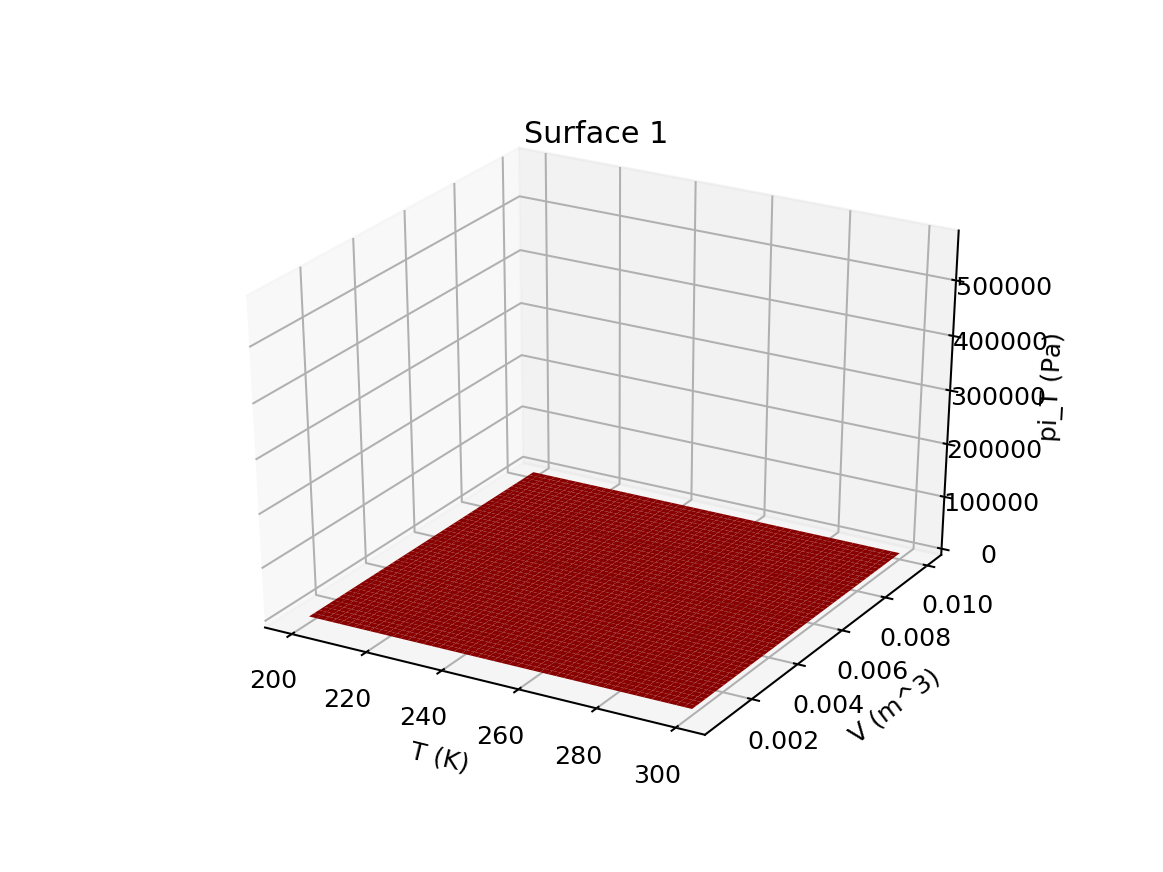

<IPython.core.display.Javascript object>


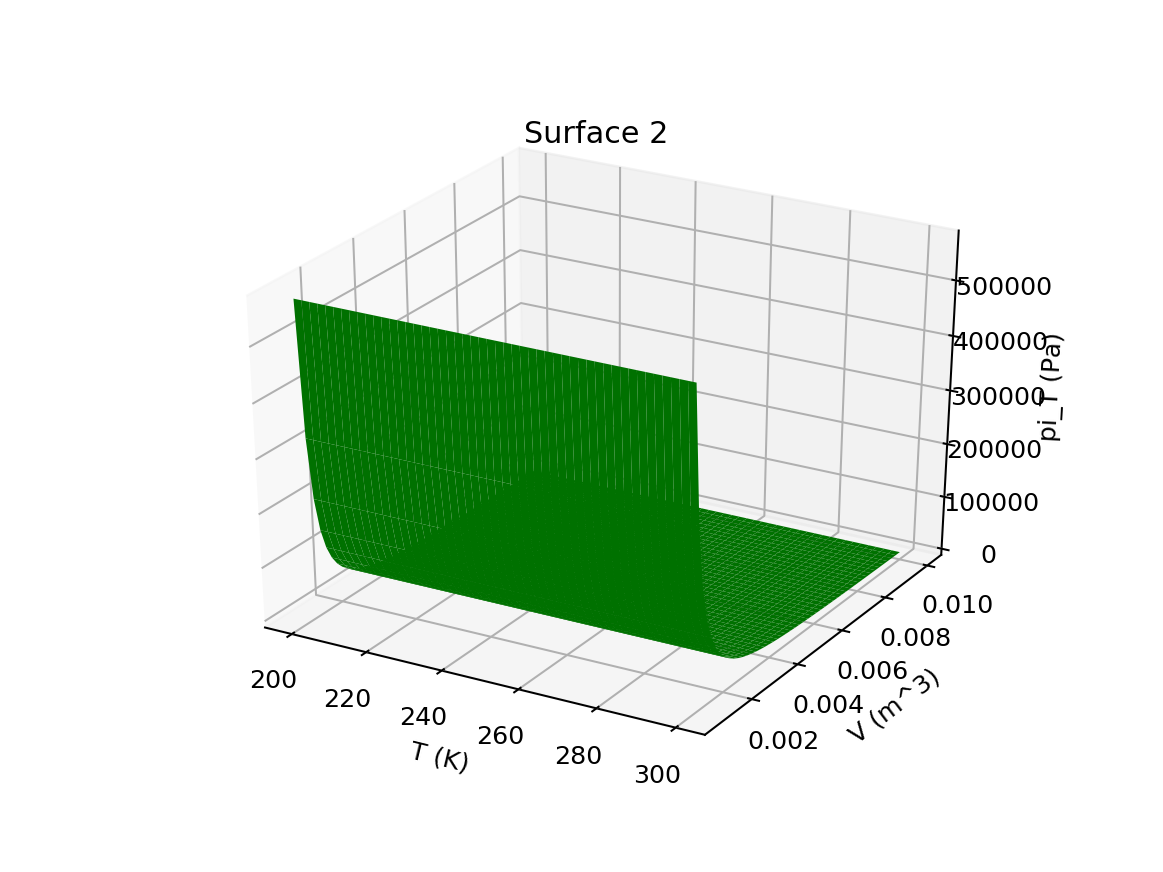

<IPython.core.display.Javascript object>


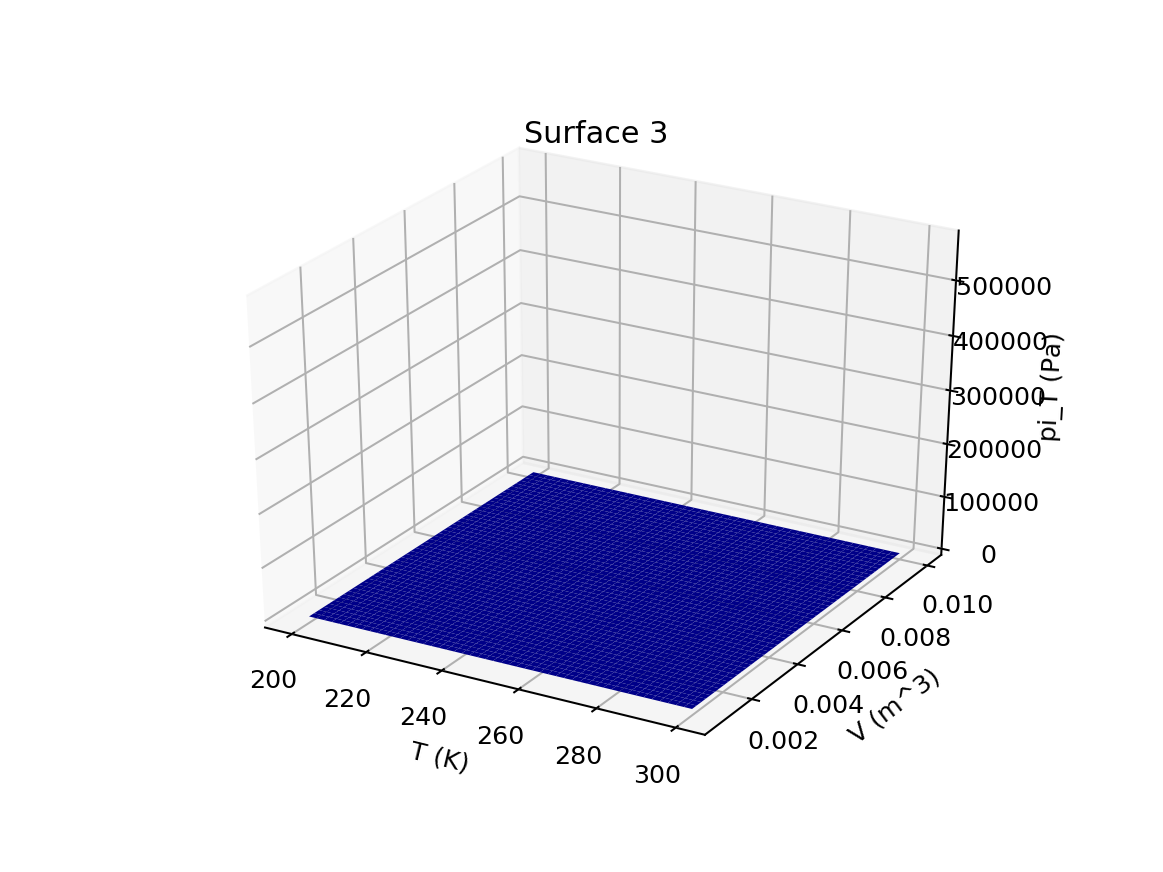

(0, 576470.5882352998)

In [8]:
# Plot surface 1 in its own space
### BEGIN SOLUTION
ax = PL.plot_surface(Tgridnew, Vgridnew, pi_T1, color='red') # Make the mesh plot
ax.set_ylabel('V (m^3)') # Label axes
ax.set_xlabel('T (K)')
ax.set_zlabel('pi_T (Pa)')
ax.set_title('Surface 1')
ax.set_zlim([0,zmax])
### END SOLUTION

# Plot surface 2 in its own space
### BEGIN SOLUTION
ax = PL.plot_surface(Tgridnew, Vgridnew, pi_T2, color='green') # Make the mesh plot
ax.set_ylabel('V (m^3)') # Label axes
ax.set_xlabel('T (K)')
ax.set_zlabel('pi_T (Pa)')
ax.set_title('Surface 2')
ax.set_zlim([0,zmax])
### END SOLUTION

# Plot surface 3 in its own space
### BEGIN SOLUTION
ax = PL.plot_surface(Tgridnew, Vgridnew, pi_T3, color='blue') # Make the mesh plot
ax.set_ylabel('V (m^3)') # Label axes
ax.set_xlabel('T (K)')
ax.set_zlabel('pi_T (Pa)')
ax.set_title('Surface 3')
ax.set_zlim([0,zmax])
### END SOLUTION

### Pause for analysis
In your paper notebook, do your best at sketching these surfaces too, along with some thoughts. $\pi_T$ is supposed to be zero for an ideal gas (and two of these are ideal gases). Did that work out? As for the surface that has $\pi_T$ *not* equal to zero, is it positive or negative? Does it seem to depend more on temperature or on volume? Finally, how do we know that the units of $\pi_T$ are Pascals? 